In [69]:
import datetime
import time
import urllib.request
import pandas as pd
import numpy as np
import hvplot.pandas
import matplotlib.pyplot as plt

In [2]:
def get_df_from_yahoo_finance (symbol): 

    end_date = datetime.datetime.now()
    end_date = int(round(end_date.timestamp())) * 1000  #<-- Convert datetime to milliseconds 
    end_date_str = str(end_date)
    end_date_str = end_date_str[:10]  #<-- This removes all but the last 10 millisecond values for the time which is format yahoo wants

    start_date_str = '345427200'
  

    ticker_dataframe = {}
    

    # Build Yahoo finance URL for the data request.
    
    yahoo_finance_url_with_symbol = ('https://query1.finance.yahoo.com/v7/finance/download/' + str(symbol)
                                     + '?period1=' + str(start_date_str) + '&period2=' + str(end_date_str)
                                     + '&interval=1mo&events=history&includeAdjustedClose=true')

    url2 = urllib.request.urlopen(yahoo_finance_url_with_symbol) #request data (comes as CSV)
    
    ticker_dataframe = pd.read_csv(url2)  #convert CSV in memory from the Yahoo request to dataframe
    ticker_dataframe.insert(1, "Ticker", symbol)

    return (ticker_dataframe)

In [73]:
list_of_tickers_for_yahoo_data_dump = ['BTC-USD','VTI','SPY','XLF','XLU','XLV','VAW','VNQ','XLP','XLY','FXN','XLI','IYC','QQQ','BND','DJP','GLD','SHV']   # <-- Add tickers here

tickers_and_data_df = pd.DataFrame({})

for ticker in list_of_tickers_for_yahoo_data_dump:
    
    single_ticker_df = get_df_from_yahoo_finance(ticker)
    tickers_and_data_df = pd.concat([tickers_and_data_df, single_ticker_df])
tickers_and_data_df

,Date,Ticker,Open,High,Low,Close,Adj Close,Volume
0,2014-10-01,BTC-USD,387.427002,411.697998,289.295990,338.321014,338.321014,902994450
1,2014-11-01,BTC-USD,338.649994,457.092987,320.626007,378.046997,378.046997,659733360
2,2014-12-01,BTC-USD,378.248993,384.037994,304.231995,320.192993,320.192993,553102310
3,2015-01-01,BTC-USD,320.434998,320.434998,171.509995,217.464005,217.464005,1098811912
4,2015-02-01,BTC-USD,216.867004,265.610992,212.014999,254.263000,254.263000,711518700
...,...,...,...,...,...,...,...,...
183,2022-05-01,SHV,110.160004,110.290001,110.120003,110.239998,109.942024,105967400
184,2022-06-01,SHV,110.209999,110.209999,109.949997,110.099998,109.835297,114922600
185,2022-07-01,SHV,110.029999,110.120003,109.949997,110.120003,109.912086,89184400
186,2022-08-01,SHV,109.970001,110.019997,109.959999,109.980003,109.849174,14531500


In [55]:
pivot = pd.pivot_table(
    data=tickers_and_data_df,
    index='Date',
    columns ='Ticker',
    
)

pivot = pivot.dropna()


In [56]:
# from pathlib import Path  
# filepath = Path('data/pivot.csv')  
# filepath.parent.mkdir(parents=True, exist_ok=True)  
# pivot.to_csv(filepath)

In [57]:
pivot = pivot['Close']
pivot

Ticker,BND,BTC-USD,DJP,FXN,GLD,IYC,QQQ,SHV,SPY,VAW,VNQ,VTI,XLF,XLI,XLP,XLU,XLV,XLY
Date,,,,,,,,,,,,,,,,,,
2014-10-01,82.360001,338.321014,34.060001,24.200001,112.660004,31.905001,101.400002,110.269997,201.660004,108.400002,78.989998,104.019997,19.366369,55.209999,46.709999,45.470001,67.269997,68.099998
2014-11-01,82.870003,378.046997,32.619999,21.500000,112.110001,33.927502,106.010002,110.260002,207.199997,109.559998,80.570000,106.599998,19.821283,56.910000,49.299999,46.000000,69.610001,71.809998
2014-12-01,82.370003,320.192993,29.910000,20.930000,113.580002,34.439999,103.250000,110.250000,205.539993,107.389999,81.000000,106.000000,20.089357,56.580002,48.490002,47.220001,68.379997,72.150002
2015-01-01,84.349998,217.464005,28.570000,20.010000,123.449997,33.730000,101.099998,110.260002,199.449997,104.480003,86.550003,103.099998,18.692120,54.570000,48.020000,48.320000,69.269997,69.989998
2015-02-01,83.080002,254.263000,29.370001,21.879999,116.160004,36.115002,108.400002,110.279999,210.660004,112.580002,83.370003,109.019997,19.780666,57.490002,50.009998,45.230000,72.239998,75.970001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-01,76.190002,37714.875000,38.599998,15.120000,176.910004,66.660004,313.250000,110.199997,412.000000,186.119995,103.940002,206.880005,34.509998,95.139999,77.639999,71.260002,130.289993,162.880005
2022-05-01,76.680000,31792.310547,39.459999,17.590000,171.139999,63.599998,308.279999,110.239998,412.929993,188.179993,99.070000,206.360001,35.470001,94.699997,74.470001,74.330002,132.229996,154.539993
2022-06-01,75.260002,19784.726563,34.799999,14.760000,168.460007,56.740002,280.279999,110.099998,377.250000,160.210007,91.110001,188.619995,31.450001,87.339996,72.180000,70.129997,128.240005,137.479996


In [58]:
pct_change = pivot.pct_change().dropna()
pct_change.head()


Ticker,BND,BTC-USD,DJP,FXN,GLD,IYC,QQQ,SHV,SPY,VAW,VNQ,VTI,XLF,XLI,XLP,XLU,XLV,XLY
Date,,,,,,,,,,,,,,,,,,
2014-11-01,0.006192,0.117421,-0.042278,-0.111570,-0.004882,0.063391,0.045464,-0.000091,0.027472,0.010701,0.020003,0.024803,0.023490,0.030792,0.055449,0.011656,0.034785,0.054479
2014-12-01,-0.006034,-0.153034,-0.083078,-0.026512,0.013112,0.015106,-0.026035,-0.000091,-0.008012,-0.019806,0.005337,-0.005628,0.013525,-0.005799,-0.016430,0.026522,-0.017670,0.004735
2015-01-01,0.024038,-0.320835,-0.044801,-0.043956,0.086899,-0.020616,-0.020823,0.000091,-0.029629,-0.027097,0.068519,-0.027359,-0.069551,-0.035525,-0.009693,0.023295,0.013016,-0.029938
2015-02-01,-0.015056,0.169219,0.028001,0.093453,-0.059052,0.070709,0.072206,0.000181,0.056205,0.077527,-0.036742,0.057420,0.058236,0.053509,0.041441,-0.063949,0.042876,0.085441
2015-03-01,0.003491,-0.039483,-0.055839,-0.035649,-0.021522,-0.001800,-0.025830,-0.000091,-0.020080,-0.035797,0.011275,-0.016236,-0.009856,-0.029918,-0.025395,-0.017687,0.003599,-0.008161


In [59]:
std = pct_change.std()
std

Ticker
BND        0.011595
BTC-USD    0.230067
DJP        0.049341
FXN        0.123623
GLD        0.040314
IYC        0.052193
QQQ        0.052976
SHV        0.000662
SPY        0.043952
VAW        0.057105
VNQ        0.048265
VTI        0.045207
XLF        0.057309
XLI        0.052963
XLP        0.035730
XLU        0.042043
XLV        0.041628
XLY        0.055970
dtype: float64

In [9]:
def sharpe_ratio_calculator(list):
    for ticker in list:
        annualized_std = std[ticker]*np.sqrt(12)
        average_annual_return = pct_change[ticker].mean()*12
        sharpe_ratio = average_annual_return/annualized_std
        print(f"{ticker} sharpe ratio = {sharpe_ratio}")
        

In [10]:
sharpe_ratio_calculator(list_of_tickers_for_yahoo_data_dump)    

BTC-USD sharpe ratio = 1.0614713477149984
VTI sharpe ratio = 0.6445333967954129
SPY sharpe ratio = 0.6790724332995453
XLF sharpe ratio = 0.45699134501536964
XLU sharpe ratio = 0.5043556440984895
XLV sharpe ratio = 0.6684850141367809
VAW sharpe ratio = 0.39118099065694784
VNQ sharpe ratio = 0.25099371614290633
XLP sharpe ratio = 0.5453453703962002
XLY sharpe ratio = 0.6806329204278024
FXN sharpe ratio = 0.0823154328992225
XLI sharpe ratio = 0.4787295679718347
IYC sharpe ratio = 0.6140528654851116
QQQ sharpe ratio = 0.8964076203946585
BND sharpe ratio = -0.22121282796185615
DJP sharpe ratio = 0.10210718648862326
GLD sharpe ratio = 0.42703651015460115
SHV sharpe ratio = -0.14547931378018


In [11]:
pct_change.corr()

Ticker,BND,BTC-USD,DJP,FXN,GLD,IYC,QQQ,SHV,SPY,VAW,VNQ,VTI,XLF,XLI,XLP,XLU,XLV,XLY
Ticker,,,,,,,,,,,,,,,,,,
BND,1.000000,0.156789,-0.153826,0.033604,0.426510,0.281209,0.310435,0.222231,0.235759,0.093554,0.443627,0.237502,-0.001960,0.124959,0.173387,0.350659,0.177564,0.296441
BTC-USD,0.156789,1.000000,0.166672,0.180820,0.048476,0.350277,0.324434,-0.123755,0.349556,0.300117,0.241567,0.346904,0.331180,0.315860,0.251986,0.252138,0.217449,0.321755
DJP,-0.153826,0.166672,1.000000,0.584158,0.152448,0.300032,0.254783,-0.097571,0.408789,0.488915,0.270394,0.416828,0.462003,0.425524,0.231818,0.145689,0.242968,0.301949
FXN,0.033604,0.180820,0.584158,1.000000,-0.035909,0.580583,0.497094,-0.250049,0.652267,0.683275,0.454435,0.671956,0.666217,0.616394,0.317005,0.140936,0.448178,0.590391
GLD,0.426510,0.048476,0.152448,-0.035909,1.000000,0.006828,0.023885,0.124280,0.024173,0.129370,0.140558,0.016142,-0.160493,-0.002510,0.173340,0.296272,0.115290,0.018555
IYC,0.281209,0.350277,0.300032,0.580583,0.006828,1.000000,0.897055,-0.074588,0.942506,0.800834,0.706800,0.946100,0.793912,0.866232,0.655966,0.373555,0.736781,0.973374
QQQ,0.310435,0.324434,0.254783,0.497094,0.023885,0.897055,1.000000,-0.019016,0.927126,0.745646,0.618385,0.920581,0.684074,0.773753,0.580999,0.348412,0.731023,0.914033
SHV,0.222231,-0.123755,-0.097571,-0.250049,0.124280,-0.074588,-0.019016,1.000000,-0.085587,-0.144567,0.002835,-0.102351,-0.185913,-0.104320,0.027998,0.060362,-0.004896,-0.078894
SPY,0.235759,0.349556,0.408789,0.652267,0.024173,0.942506,0.927126,-0.085587,1.000000,0.884060,0.731984,0.995888,0.859988,0.922547,0.695169,0.442961,0.811171,0.928545


In [12]:
#calculate rolling var and cov
rolling_cov_btc_spy = pct_change['BTC-USD'].rolling(window=3).cov(pct_change['SPY'])
rolling_var_spy = pct_change['SPY'].rolling(window=3).var()

In [13]:
rolling_beta_btc = rolling_cov_btc_spy/rolling_var_spy

In [14]:
rolling_cov =pd.DataFrame()
rolling_beta=pd.DataFrame()
def rolling_beta_calculate(list):
    for ticker in list:
        rolling_cov[ticker]=pct_change[ticker].rolling(window=3).cov(pct_change['SPY'])
        rolling_beta[ticker] = rolling_cov[ticker]/rolling_var_spy
        #print(f"added {ticker} to pct_change dataframe")
        print(f"{ticker}")
    return rolling_beta

In [15]:
rolling_beta_calculate(list_of_tickers_for_yahoo_data_dump)

BTC-USD
VTI
SPY
XLF
XLU
XLV
VAW
VNQ
XLP
XLY
FXN
XLI
IYC
QQQ
BND
DJP
GLD
SHV


,BTC-USD,VTI,SPY,XLF,XLU,XLV,VAW,VNQ,XLP,XLY,FXN,XLI,IYC,QQQ,BND,DJP,GLD,SHV
Date,,,,,,,,,,,,,,,,,,
2014-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01,7.669830,0.907979,1.0,1.496357,-0.225057,0.489483,0.681473,-0.725046,1.228106,1.470819,-1.303788,1.148540,1.460301,1.245132,-0.247697,0.153261,-1.498792,-0.002863
2015-02-01,5.551240,0.986357,1.0,1.307480,-1.106192,0.483981,1.286808,-1.095696,0.665604,1.324210,1.662012,1.011272,1.018650,1.185855,-0.383416,1.049844,-1.568490,0.001784
2015-03-01,4.569274,0.979206,1.0,1.260196,-0.859233,0.411907,1.321141,-0.997479,0.703241,1.299275,1.635958,1.058892,1.020463,1.161011,-0.374052,0.944366,-1.237080,0.002018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-01,1.804168,0.985968,1.0,0.761242,1.149525,0.845764,0.775181,0.810361,-0.072402,1.327796,1.294363,0.872346,1.073136,1.483461,0.101195,0.339625,0.257055,0.000732
2022-05-01,1.485523,0.987817,1.0,0.910595,1.099197,0.814102,0.732563,0.612363,-0.216906,1.204919,1.537868,0.858712,1.002586,1.451993,0.200643,0.210957,0.185694,0.002548
2022-06-01,1.290919,0.964505,1.0,1.499982,1.037003,0.611519,1.170377,0.148920,-0.420758,0.714870,2.998727,0.808881,0.715152,1.097149,0.414264,0.632935,-0.160882,0.013601


In [16]:
rolling_beta.dropna()

,BTC-USD,VTI,SPY,XLF,XLU,XLV,VAW,VNQ,XLP,XLY,FXN,XLI,IYC,QQQ,BND,DJP,GLD,SHV
Date,,,,,,,,,,,,,,,,,,
2015-01-01,7.669830,0.907979,1.0,1.496357,-0.225057,0.489483,0.681473,-0.725046,1.228106,1.470819,-1.303788,1.148540,1.460301,1.245132,-0.247697,0.153261,-1.498792,-0.002863
2015-02-01,5.551240,0.986357,1.0,1.307480,-1.106192,0.483981,1.286808,-1.095696,0.665604,1.324210,1.662012,1.011272,1.018650,1.185855,-0.383416,1.049844,-1.568490,0.001784
2015-03-01,4.569274,0.979206,1.0,1.260196,-0.859233,0.411907,1.321141,-0.997479,0.703241,1.299275,1.635958,1.058892,1.020463,1.161011,-0.374052,0.944366,-1.237080,0.002018
2015-04-01,2.875885,0.977593,1.0,0.922337,-0.664173,0.570376,1.458142,-0.534908,0.891745,1.280991,1.523093,1.103491,1.019260,1.272867,-0.239907,0.937923,-0.556152,0.003428
2015-05-01,0.344500,0.830875,1.0,0.674877,0.609546,0.553325,1.538824,-1.201673,0.856896,0.488423,1.020501,0.970060,0.107551,1.482785,-0.309227,2.057766,0.757938,0.004093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-01,1.804168,0.985968,1.0,0.761242,1.149525,0.845764,0.775181,0.810361,-0.072402,1.327796,1.294363,0.872346,1.073136,1.483461,0.101195,0.339625,0.257055,0.000732
2022-05-01,1.485523,0.987817,1.0,0.910595,1.099197,0.814102,0.732563,0.612363,-0.216906,1.204919,1.537868,0.858712,1.002586,1.451993,0.200643,0.210957,0.185694,0.002548
2022-06-01,1.290919,0.964505,1.0,1.499982,1.037003,0.611519,1.170377,0.148920,-0.420758,0.714870,2.998727,0.808881,0.715152,1.097149,0.414264,0.632935,-0.160882,0.013601


In [17]:
rolling_beta_plot = rolling_beta.hvplot(
    ylabel = "BETA",
    xlabel="Date",  
    width=1000,
    height=600,
    stacked = True,
    legend = 'top_left'
    
)

In [86]:
rolling_beta_plot

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [19]:
cov = pct_change['BTC-USD'].cov(pct_change['SPY'])
var = pct_change['SPY'].var()
beta = cov/var

In [20]:
beta

1.8297708071101626

# McKenzie Litmus test


In [21]:
#sharpe ratio(new investment) > (current sharpe ratio * expected correlation)
sharpe_dict = {}

def sharpe_ratio_calculator(list):
    for ticker in list:
        annualized_std = std[ticker]*np.sqrt(12)
        average_annual_return = pct_change[ticker].mean()*12
        sharpe_ratio = average_annual_return/annualized_std
        print(f"{ticker} sharpe ratio = {sharpe_ratio}")
        sharpe_dict.update({ticker:sharpe_ratio})
    return sharpe_dict

In [22]:
sharpe_ratio_calculator(list_of_tickers_for_yahoo_data_dump)

BTC-USD sharpe ratio = 1.0614713477149984
VTI sharpe ratio = 0.6445333967954129
SPY sharpe ratio = 0.6790724332995453
XLF sharpe ratio = 0.45699134501536964
XLU sharpe ratio = 0.5043556440984895
XLV sharpe ratio = 0.6684850141367809
VAW sharpe ratio = 0.39118099065694784
VNQ sharpe ratio = 0.25099371614290633
XLP sharpe ratio = 0.5453453703962002
XLY sharpe ratio = 0.6806329204278024
FXN sharpe ratio = 0.0823154328992225
XLI sharpe ratio = 0.4787295679718347
IYC sharpe ratio = 0.6140528654851116
QQQ sharpe ratio = 0.8964076203946585
BND sharpe ratio = -0.22121282796185615
DJP sharpe ratio = 0.10210718648862326
GLD sharpe ratio = 0.42703651015460115
SHV sharpe ratio = -0.14547931378018


{'BTC-USD': 1.0614713477149984,
 'VTI': 0.6445333967954129,
 'SPY': 0.6790724332995453,
 'XLF': 0.45699134501536964,
 'XLU': 0.5043556440984895,
 'XLV': 0.6684850141367809,
 'VAW': 0.39118099065694784,
 'VNQ': 0.25099371614290633,
 'XLP': 0.5453453703962002,
 'XLY': 0.6806329204278024,
 'FXN': 0.0823154328992225,
 'XLI': 0.4787295679718347,
 'IYC': 0.6140528654851116,
 'QQQ': 0.8964076203946585,
 'BND': -0.22121282796185615,
 'DJP': 0.10210718648862326,
 'GLD': 0.42703651015460115,
 'SHV': -0.14547931378018}

In [23]:
corr_df = pct_change.corr()
display(corr_df)
pandemic_corr = pct_change['2020-01-01':'2022-06-01'].corr()
display(pandemic_corr)
before_pandemic_corr = pct_change['2014-10-01':'2020-02-01'].corr()
display(before_pandemic_corr)

Ticker,BND,BTC-USD,DJP,FXN,GLD,IYC,QQQ,SHV,SPY,VAW,VNQ,VTI,XLF,XLI,XLP,XLU,XLV,XLY
Ticker,,,,,,,,,,,,,,,,,,
BND,1.000000,0.156789,-0.153826,0.033604,0.426510,0.281209,0.310435,0.222231,0.235759,0.093554,0.443627,0.237502,-0.001960,0.124959,0.173387,0.350659,0.177564,0.296441
BTC-USD,0.156789,1.000000,0.166672,0.180820,0.048476,0.350277,0.324434,-0.123755,0.349556,0.300117,0.241567,0.346904,0.331180,0.315860,0.251986,0.252138,0.217449,0.321755
DJP,-0.153826,0.166672,1.000000,0.584158,0.152448,0.300032,0.254783,-0.097571,0.408789,0.488915,0.270394,0.416828,0.462003,0.425524,0.231818,0.145689,0.242968,0.301949
FXN,0.033604,0.180820,0.584158,1.000000,-0.035909,0.580583,0.497094,-0.250049,0.652267,0.683275,0.454435,0.671956,0.666217,0.616394,0.317005,0.140936,0.448178,0.590391
GLD,0.426510,0.048476,0.152448,-0.035909,1.000000,0.006828,0.023885,0.124280,0.024173,0.129370,0.140558,0.016142,-0.160493,-0.002510,0.173340,0.296272,0.115290,0.018555
IYC,0.281209,0.350277,0.300032,0.580583,0.006828,1.000000,0.897055,-0.074588,0.942506,0.800834,0.706800,0.946100,0.793912,0.866232,0.655966,0.373555,0.736781,0.973374
QQQ,0.310435,0.324434,0.254783,0.497094,0.023885,0.897055,1.000000,-0.019016,0.927126,0.745646,0.618385,0.920581,0.684074,0.773753,0.580999,0.348412,0.731023,0.914033
SHV,0.222231,-0.123755,-0.097571,-0.250049,0.124280,-0.074588,-0.019016,1.000000,-0.085587,-0.144567,0.002835,-0.102351,-0.185913,-0.104320,0.027998,0.060362,-0.004896,-0.078894
SPY,0.235759,0.349556,0.408789,0.652267,0.024173,0.942506,0.927126,-0.085587,1.000000,0.884060,0.731984,0.995888,0.859988,0.922547,0.695169,0.442961,0.811171,0.928545


Ticker,BND,BTC-USD,DJP,FXN,GLD,IYC,QQQ,SHV,SPY,VAW,VNQ,VTI,XLF,XLI,XLP,XLU,XLV,XLY
Ticker,,,,,,,,,,,,,,,,,,
BND,1.000000,0.324852,-0.160933,0.218081,0.326702,0.494225,0.602737,0.096235,0.483221,0.311605,0.367797,0.492252,0.311328,0.314758,0.136207,0.220053,0.386396,0.523700
BTC-USD,0.324852,1.000000,0.254623,0.444815,0.154763,0.690405,0.595024,-0.158778,0.628905,0.573171,0.567263,0.651092,0.624602,0.591650,0.381303,0.430685,0.441367,0.648757
DJP,-0.160933,0.254623,1.000000,0.523885,0.123974,0.403816,0.261038,-0.457229,0.453415,0.516832,0.477854,0.465169,0.613893,0.506116,0.332478,0.261854,0.279990,0.348750
FXN,0.218081,0.444815,0.523885,1.000000,0.060691,0.674527,0.537306,-0.549620,0.696121,0.690761,0.599603,0.712889,0.761490,0.663006,0.432293,0.257891,0.556661,0.644161
GLD,0.326702,0.154763,0.123974,0.060691,1.000000,0.244542,0.303838,-0.070259,0.283240,0.332498,0.245351,0.273039,0.138631,0.176276,0.379165,0.355207,0.375778,0.272758
IYC,0.494225,0.690405,0.403816,0.674527,0.244542,1.000000,0.918652,-0.356153,0.967710,0.879663,0.857700,0.974986,0.844673,0.902965,0.696327,0.515233,0.794676,0.968033
QQQ,0.602737,0.595024,0.261038,0.537306,0.303838,0.918652,1.000000,-0.209765,0.925200,0.742606,0.764520,0.925464,0.684174,0.761380,0.595496,0.478433,0.785718,0.938178
SHV,0.096235,-0.158778,-0.457229,-0.549620,-0.070259,-0.356153,-0.209765,1.000000,-0.360883,-0.390048,-0.394063,-0.393025,-0.430148,-0.414093,-0.278317,-0.149883,-0.251162,-0.358754
SPY,0.483221,0.628905,0.453415,0.696121,0.283240,0.967710,0.925200,-0.360883,1.000000,0.905148,0.902950,0.995970,0.877683,0.924498,0.755283,0.618634,0.861221,0.940511


Ticker,BND,BTC-USD,DJP,FXN,GLD,IYC,QQQ,SHV,SPY,VAW,VNQ,VTI,XLF,XLI,XLP,XLU,XLV,XLY
Ticker,,,,,,,,,,,,,,,,,,
BND,1.000000,0.033213,-0.221855,-0.334168,0.582472,-0.172185,-0.106034,0.375599,-0.196099,-0.249421,0.422660,-0.203952,-0.481213,-0.215099,0.112194,0.405754,-0.089339,-0.172923
BTC-USD,0.033213,1.000000,0.090787,-0.062754,0.019257,0.097171,0.150621,-0.089181,0.150797,0.102868,0.011117,0.127341,0.119481,0.128176,0.182787,0.159151,0.084091,0.077164
DJP,-0.221855,0.090787,1.000000,0.682527,0.166187,0.231198,0.248298,0.152450,0.381951,0.497933,0.022703,0.388016,0.339941,0.368282,0.163952,-0.008145,0.252610,0.282177
FXN,-0.334168,-0.062754,0.682527,1.000000,-0.142419,0.495704,0.449825,-0.001210,0.615425,0.721579,0.247645,0.639996,0.585373,0.591646,0.232377,-0.020667,0.393449,0.553398
GLD,0.582472,0.019257,0.166187,-0.142419,1.000000,-0.155645,-0.149011,0.300899,-0.156533,-0.020422,0.099308,-0.166422,-0.379501,-0.110372,0.048418,0.294732,-0.048557,-0.154610
IYC,-0.172185,0.097171,0.231198,0.495704,-0.155645,1.000000,0.868000,0.131540,0.922051,0.751079,0.504960,0.919417,0.764425,0.838066,0.677075,0.200026,0.761090,0.979066
QQQ,-0.106034,0.150621,0.248298,0.449825,-0.149011,0.868000,1.000000,0.126204,0.922789,0.737918,0.439556,0.908683,0.684443,0.779185,0.591304,0.220961,0.706220,0.889459
SHV,0.375599,-0.089181,0.152450,-0.001210,0.300899,0.131540,0.126204,1.000000,0.111365,-0.025439,0.334228,0.118517,-0.044495,0.110382,0.208178,0.252099,0.096966,0.135829
SPY,-0.196099,0.150797,0.381951,0.615425,-0.156533,0.922051,0.922789,0.111365,1.000000,0.865148,0.515956,0.996040,0.851424,0.923944,0.674461,0.253935,0.803398,0.927680


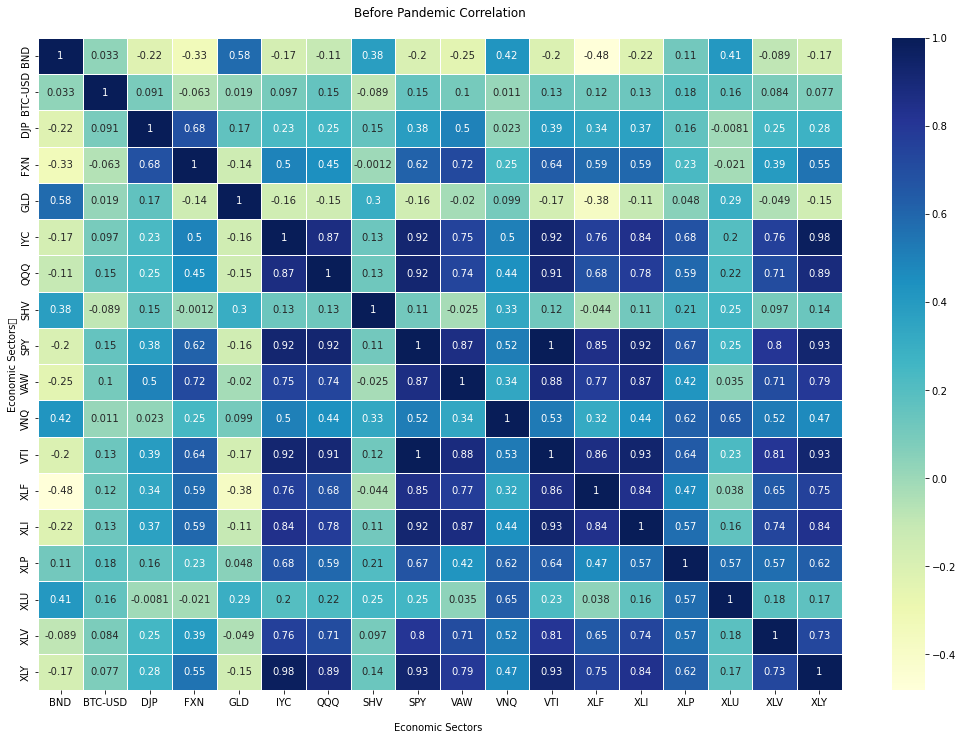

<Figure size 432x288 with 0 Axes>

In [31]:
import seaborn as sns

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(18,12))
hm = sns.heatmap(before_pandemic_corr, annot = True,annot_kws={'size': 10}, linewidth=.5,ax=ax, cmap="YlGnBu")
hm.set(xlabel='\nEconomic Sectors ', ylabel='Economic Sectors\t', title = "Before Pandemic Correlation\n")
plt.show()
plt.savefig("Plotting_Correlation_HeatMap.jpg")

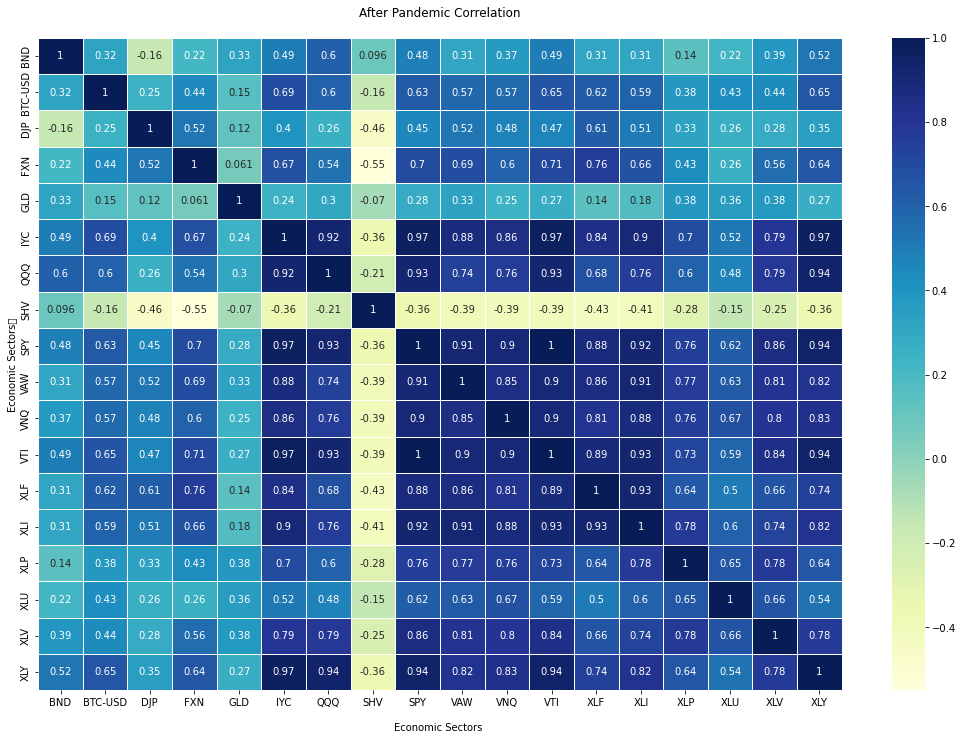

<Figure size 432x288 with 0 Axes>

In [30]:
fig, ax = plt.subplots(figsize=(18,12))
hm = sns.heatmap(pandemic_corr, annot = True,annot_kws={'size': 10}, linewidth=.5,ax=ax, cmap="YlGnBu")
hm.set(xlabel='\nEconomic Sectors ', ylabel='Economic Sectors\t', title = "After Pandemic Correlation\n")
plt.show()
plt.savefig("Plotting_Correlation_HeatMap.jpg")

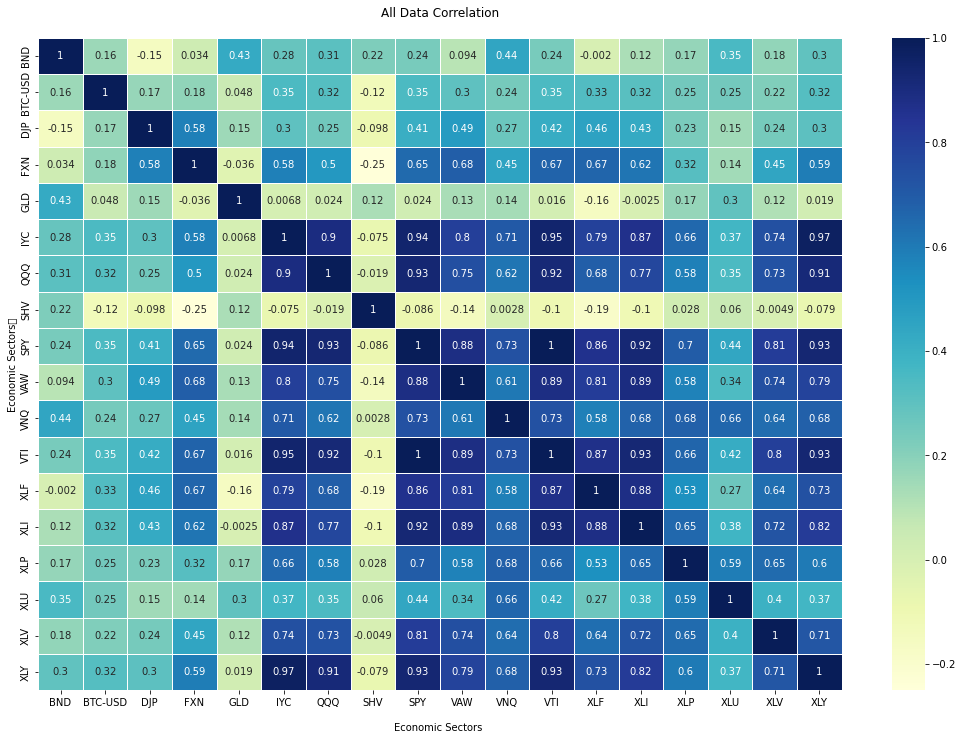

<Figure size 432x288 with 0 Axes>

In [26]:
fig, ax = plt.subplots(figsize=(18,12))
hm = sns.heatmap(corr_df, annot = True,annot_kws={'size': 10}, linewidth=.5,ax=ax, cmap="YlGnBu")
hm.set(xlabel='\nEconomic Sectors ', ylabel='Economic Sectors\t', title = "All Data Correlation\n")
plt.show()
plt.savefig("Plotting_Correlation_HeatMap.jpg")

In [32]:
display(corr_df.loc['BTC-USD','GLD'])

display(sharpe_dict['BTC-USD'])
result = corr_df.loc['BTC-USD','GLD'] * sharpe_dict['BTC-USD']

result

0.04847636287035656

1.0614713477149984

0.05145627022831869

In [33]:
if sharpe_dict['GLD'] > (sharpe_dict['BTC-USD'] * corr_df.loc['BTC-USD','GLD']):
    print("This passes the Mckenzie test and should potentially be added to your portfolio")

This passes the Mckenzie test and should potentially be added to your portfolio


In [34]:
def mckenzie_test(current_holding, new_potential_holding):
    if sharpe_dict[new_potential_holding] > (sharpe_dict[current_holding] * corr_df.loc[current_holding,new_potential_holding]):
        print (f"{new_potential_holding} passes the McKenzie test and should be evaluated futher for your portfolio.")
        #print(f"The sharpe ratio of your current holding {current_holding} is {sharpe_dict[current_holding]} and {sharpe_dict[new_potential_holding]} for your new potential holding")
        #print(f"The expected correlation is {corr_df.loc[current_holding,new_potential_holding]}")
        #print(f"So therefore {corr_df.loc[current_holding,new_potential_holding]} * {sharpe_dict[current_holding]} is < {sharpe_dict[new_potential_holding]} so you should this passes the test")
        
    else:
        print(f"{new_potential_holding} does not pass the McKenzie test")
              

In [35]:
#Gold = GLD VNQ = Real Estate, BND = Bonds, DJP = Commodities, 
mckenzie_test('BTC-USD','GLD')


GLD passes the McKenzie test and should be evaluated futher for your portfolio.


In [36]:
def test_all_tickers(list):
    for ticker in list:
        mckenzie_test('BTC-USD',ticker)

In [37]:
test_all_tickers(list_of_tickers_for_yahoo_data_dump)

BTC-USD does not pass the McKenzie test
VTI passes the McKenzie test and should be evaluated futher for your portfolio.
SPY passes the McKenzie test and should be evaluated futher for your portfolio.
XLF passes the McKenzie test and should be evaluated futher for your portfolio.
XLU passes the McKenzie test and should be evaluated futher for your portfolio.
XLV passes the McKenzie test and should be evaluated futher for your portfolio.
VAW passes the McKenzie test and should be evaluated futher for your portfolio.
VNQ does not pass the McKenzie test
XLP passes the McKenzie test and should be evaluated futher for your portfolio.
XLY passes the McKenzie test and should be evaluated futher for your portfolio.
FXN does not pass the McKenzie test
XLI passes the McKenzie test and should be evaluated futher for your portfolio.
IYC passes the McKenzie test and should be evaluated futher for your portfolio.
QQQ passes the McKenzie test and should be evaluated futher for your portfolio.
BND does

In [38]:
def mckenzie_test(current_holding, new_potential_holding):
    if sharpe_dict[new_potential_holding] > (sharpe_dict[current_holding] * pandemic_corr.loc[current_holding,new_potential_holding]):
        print (f"{new_potential_holding} passes the McKenzie test and should be evaluated futher for your portfolio.")
        #print(f"The sharpe ratio of your current holding {current_holding} is {sharpe_dict[current_holding]} and {sharpe_dict[new_potential_holding]} for your new potential holding")
        #print(f"The expected correlation is {corr_df.loc[current_holding,new_potential_holding]}")
        #print(f"So therefore {corr_df.loc[current_holding,new_potential_holding]} * {sharpe_dict[current_holding]} is < {sharpe_dict[new_potential_holding]} so you should this passes the test")
        
    else:
        print(f"{new_potential_holding} does not pass the McKenzie test")

In [39]:
def test_all_tickers(list):
    for ticker in list:
        mckenzie_test('BTC-USD',ticker)

In [40]:
test_all_tickers(list_of_tickers_for_yahoo_data_dump)

BTC-USD does not pass the McKenzie test
VTI does not pass the McKenzie test
SPY passes the McKenzie test and should be evaluated futher for your portfolio.
XLF does not pass the McKenzie test
XLU passes the McKenzie test and should be evaluated futher for your portfolio.
XLV passes the McKenzie test and should be evaluated futher for your portfolio.
VAW does not pass the McKenzie test
VNQ does not pass the McKenzie test
XLP passes the McKenzie test and should be evaluated futher for your portfolio.
XLY does not pass the McKenzie test
FXN does not pass the McKenzie test
XLI does not pass the McKenzie test
IYC does not pass the McKenzie test
QQQ passes the McKenzie test and should be evaluated futher for your portfolio.
BND does not pass the McKenzie test
DJP does not pass the McKenzie test
GLD passes the McKenzie test and should be evaluated futher for your portfolio.
SHV passes the McKenzie test and should be evaluated futher for your portfolio.


# Analysis of mckenzie test


### Sectors that passed the test:

VTI = Total market fund | correlation = .34 <br> 
SPY = S&P 500 | correlation = .35<br> 
XLF = Financial | correlation = .33<br> 
XLU = Utilities | correlation = .25<br> 
XLV = Healthcare | correlation = .21<br> 
VAW = Materials | correlation = .30<br> 
XLP = Consumer Staples | correlation = .25<br> 
XLY = Consumer Discretionary | correlation = .32<br> 
XLI = Industrials | correlation = .32<br> 
IYC = Consumer services | correlation = .35<br> 
QQQ = technology | correlation = .32<br> 
GLD = Gold | correlation = .05<br> 

### Sectors that did not pass

VNQ = Real Estate | correlation = .24 <br> 
FXN = Energy | correlation = .18 <br> 
BND = Total bond market | correlation = .15 <br> 
DJP = Commodities | correlation = .17 <br> 
SHV = Cash | correlation = -.12 <br> 

In [41]:
btc = pct_change['BTC-USD'].hvplot()

cumulative = pd.DataFrame()
cumulative['BTC-USD'] =(1 + pct_change['BTC-USD']).cumprod() - 1  
cumulative['GLD'] =(1 + pct_change['GLD']).cumprod() - 1 
cumulative_plot = cumulative.hvplot()
cumulative

,BTC-USD,GLD
Date,,
2014-11-01,0.117421,-0.004882
2014-12-01,-0.053582,0.008166
2015-01-01,-0.357226,0.095775
2015-02-01,-0.248456,0.031067
2015-03-01,-0.278129,0.008876
...,...,...
2022-04-01,110.476596,0.570300
2022-05-01,92.970842,0.519084
2022-06-01,57.479154,0.495296


In [42]:
subset_cumulative = cumulative['2020-01-01':'2022-06-01']
subset_cumulative.hvplot()


:NdOverlay   [Variable]
   :Curve   [Date]   (value)

# Import Economic Data


In [210]:
#import house price index (for single family homes across US)
house_price_df = pd.read_csv(                    
    'https://www.econdb.com/api/series/HOUUS/?format=csv',                    
    index_col='Date', parse_dates=['Date'])



In [211]:
#import fed rates on long term bonds (10 year)
long_term_fed_rates_df = pd.read_csv(                    
    'https://www.econdb.com/api/series/Y10YDUS/?format=csv',                    
    index_col='Date', parse_dates=['Date'])

In [212]:
#import consumer price index (inflation)
cpi_df = pd.read_csv(                    
    'https://www.econdb.com/api/series/CPIUS/?format=csv',                    
    index_col='Date', parse_dates=['Date'])

In [213]:
#import consumer confidence index
consumer_confidence_df = pd.read_csv(                    
    'https://www.econdb.com/api/series/CONFUS/?format=csv',                    
    index_col='Date', parse_dates=['Date'])

In [215]:
#import M2 supply (all money circulating and in bank accounts)
money_supply_df = pd.read_csv(                    
'https://www.econdb.com/api/series/M3US/?format=csv',                    
index_col='Date', parse_dates=['Date'])

In [216]:
cpi_df= cpi_df.reset_index()
consumer_confidence_df =consumer_confidence_df.reset_index()
long_term_fed_rates_df= long_term_fed_rates_df.reset_index()
money_supply_df= money_supply_df.reset_index()

In [217]:
#cpi_df.index = pd.to_datetime(cpi_pct_change.index)
cpi_df['Date'] = pd.to_datetime(cpi_df['Date'])
consumer_confidence_df['Date'] = pd.to_datetime(consumer_confidence_df['Date'])
long_term_fed_rates_df['Date'] = pd.to_datetime(long_term_fed_rates_df['Date'])
money_supply_df['Date'] = pd.to_datetime(money_supply_df['Date'])

In [218]:
cpi_df['Date'] = cpi_df['Date'].dt.date
consumer_confidence_df['Date'] = consumer_confidence_df['Date'].dt.date
long_term_fed_rates_df['Date'] = long_term_fed_rates_df['Date'].dt.date
money_supply_df['Date'] = money_supply_df['Date'].dt.date

In [222]:
display(consumer_confidence_df)
display(long_term_fed_rates_df)
display(money_supply_df)

,Date,CONFUS,Ticker
0,1960-01-01,107.60,CPI
1,1960-02-01,105.20,CPI
2,1960-03-01,102.80,CPI
3,1960-04-01,100.40,CPI
4,1960-05-01,101.80,CPI
...,...,...,...
745,2022-02-01,67.57,CPI
746,2022-03-01,63.91,CPI
747,2022-04-01,70.15,CPI
748,2022-05-01,62.84,CPI


,Date,Y10YDUS
0,1953-04-01,2.83
1,1953-05-01,3.05
2,1953-06-01,3.11
3,1953-07-01,2.93
4,1953-08-01,2.95
...,...,...
826,2022-02-01,1.93
827,2022-03-01,2.13
828,2022-04-01,2.75
829,2022-05-01,2.90


,Date,M3US
0,1959-01-01,289.8
1,1959-02-01,287.7
2,1959-03-01,287.9
3,1959-04-01,290.2
4,1959-05-01,290.2
...,...,...
756,2022-01-01,21646.0
757,2022-02-01,21632.0
758,2022-03-01,21926.0
759,2022-04-01,21936.0


In [232]:
cpi_df['Ticker'] = 'CPI'
cpi_df['Open'] = cpi_df['CPIUS']
cpi_df['High'] =cpi_df['CPIUS']
cpi_df['Low'] = cpi_df['CPIUS']
cpi_df['Close'] =cpi_df['CPIUS']
cpi_df['Adj Close'] = cpi_df['CPIUS']
cpi_df['Volume'] =cpi_df['CPIUS']

consumer_confidence_df['Ticker'] = 'CC'
consumer_confidence_df['Open'] = consumer_confidence_df['CONFUS']
consumer_confidence_df['High'] =consumer_confidence_df['CONFUS']
consumer_confidence_df['Low'] = consumer_confidence_df['CONFUS']
consumer_confidence_df['Close'] =consumer_confidence_df['CONFUS']
consumer_confidence_df['Adj Close'] = consumer_confidence_df['CONFUS']
consumer_confidence_df['Volume'] =consumer_confidence_df['CONFUS']

long_term_fed_rates_df['Ticker'] = 'Fed_Rates'
long_term_fed_rates_df['Open'] = long_term_fed_rates_df['Y10YDUS']
long_term_fed_rates_df['High'] =long_term_fed_rates_df['Y10YDUS']
long_term_fed_rates_df['Low'] = long_term_fed_rates_df['Y10YDUS']
long_term_fed_rates_df['Close'] =long_term_fed_rates_df['Y10YDUS']
long_term_fed_rates_df['Adj Close'] = long_term_fed_rates_df['Y10YDUS']
long_term_fed_rates_df['Volume'] =long_term_fed_rates_df['Y10YDUS']

money_supply_df['Ticker'] = 'M3'
money_supply_df['Open'] = money_supply_df['M3US']
money_supply_df['High'] =money_supply_df['M3US']
money_supply_df['Low'] = money_supply_df['M3US']
money_supply_df['Close'] =money_supply_df['M3US']
money_supply_df['Adj Close'] = money_supply_df['M3US']
money_supply_df['Volume'] =money_supply_df['M3US']
#cpi_df= cpi_df.reset_index()


In [233]:
# import datetime
# cpi_df['Date'] = pd.to_datetime(cpi_df['Date']).dt.date()
# cpi_df

In [234]:
test_df = pd.concat([tickers_and_data_df, cpi_df,consumer_confidence_df,long_term_fed_rates_df,money_supply_df], axis=0)
test_df.drop("CPIUS", axis=1, inplace=True)
test_df['Date']=pd.to_datetime(test_df['Date'])

In [235]:
test_df['Date']=pd.to_datetime(test_df['Date'])

In [236]:
pivot = pd.pivot_table(
    data=test_df,
    index='Date',
    columns ='Ticker',
    
)

pivot =pivot.dropna()

In [237]:
pivot = pivot['Close']
pivot

Ticker,BND,BTC-USD,CC,CPI,DJP,FXN,Fed_Rates,GLD,IYC,M3,...,SPY,VAW,VNQ,VTI,XLF,XLI,XLP,XLU,XLV,XLY
Date,,,,,,,,,,,,,,,,,,,,,
2014-10-01,82.360001,338.321014,93.50,237.4,34.060001,24.200001,2.30,112.660004,31.905001,11539.0,...,201.660004,108.400002,78.989998,104.019997,19.366369,55.209999,46.709999,45.470001,67.269997,68.099998
2014-11-01,82.870003,378.046997,95.54,237.0,32.619999,21.500000,2.33,112.110001,33.927502,11615.0,...,207.199997,109.559998,80.570000,106.599998,19.821283,56.910000,49.299999,46.000000,69.610001,71.809998
2014-12-01,82.370003,320.192993,100.70,236.3,29.910000,20.930000,2.21,113.580002,34.439999,11760.0,...,205.539993,107.389999,81.000000,106.000000,20.089357,56.580002,48.490002,47.220001,68.379997,72.150002
2015-01-01,84.349998,217.464005,105.60,234.7,28.570000,20.010000,1.88,123.449997,33.730000,11759.0,...,199.449997,104.480003,86.550003,103.099998,18.692120,54.570000,48.020000,48.320000,69.269997,69.989998
2015-02-01,83.080002,254.263000,102.60,235.3,29.370001,21.879999,1.98,116.160004,36.115002,11847.0,...,210.660004,112.580002,83.370003,109.019997,19.780666,57.490002,50.009998,45.230000,72.239998,75.970001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-01,83.000000,38483.125000,72.30,281.9,31.620001,13.460000,1.76,168.089996,75.860001,21646.0,...,449.910004,183.009995,106.239998,226.809998,39.060001,100.739998,75.970001,69.250000,131.229996,184.949997
2022-02-01,81.919998,43193.234375,67.57,284.2,33.939999,14.370000,1.93,178.380005,73.570000,21632.0,...,436.630005,184.130005,102.540001,221.169998,38.520000,99.889999,74.900002,67.930000,129.960007,177.429993
2022-03-01,79.540001,45538.675781,63.91,287.7,36.910000,15.930000,2.13,180.649994,75.040001,21926.0,...,451.640015,194.050003,108.370003,227.669998,38.320000,102.980003,75.889999,74.459999,136.990005,185.000000


In [238]:
from pathlib import Path  
filepath = Path('data/pivot.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
pivot.to_csv(filepath) 

In [243]:
pct_change = pivot.pct_change().dropna()
corr_with_cpi = pct_change.corr()

pandemic_corr = pct_change['2020-01-01':'2022-06-01'].corr()

before_pandemic_corr = pct_change['2014-10-01':'2020-02-01'].corr()


<AxesSubplot:xlabel='Date'>

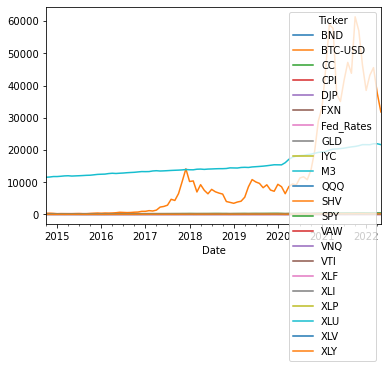

In [240]:
pivot.plot()

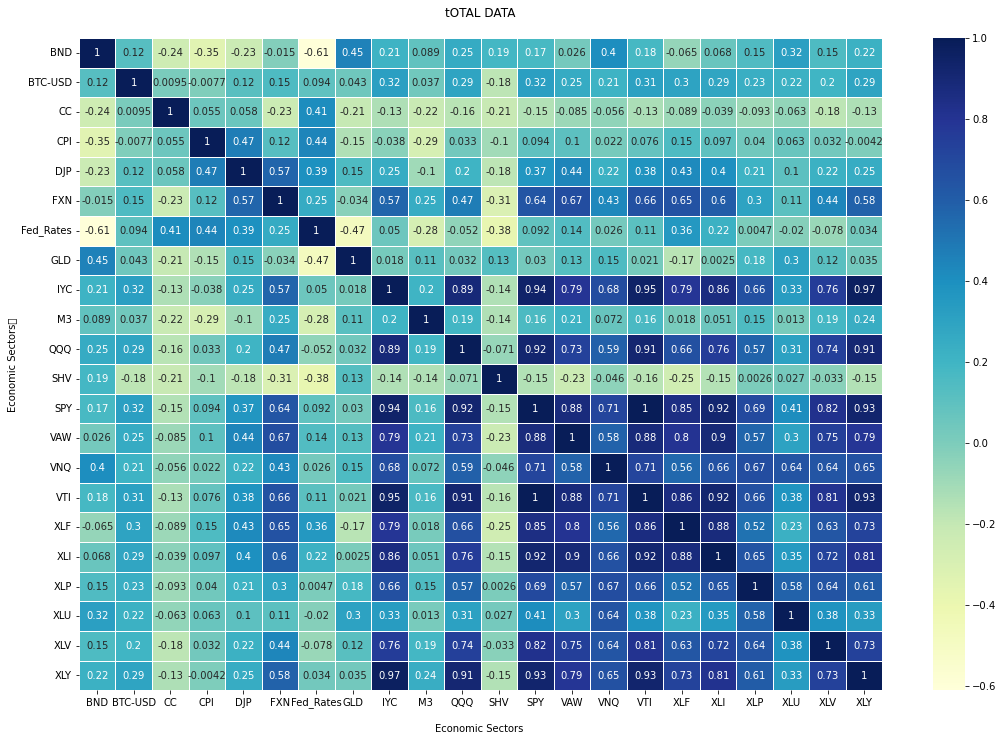

In [247]:
fig, ax = plt.subplots(figsize=(18,12))
hm = sns.heatmap(corr_with_cpi, annot = True,annot_kws={'size': 10}, linewidth=.5,ax=ax, cmap="YlGnBu")
hm.set(xlabel='\nEconomic Sectors ', ylabel='Economic Sectors\t', title = "tOTAL DATA\n")
plt.show()
#plt.savefig("Plotting_Correlation_HeatMap.jpg")


C:\Users\deerr\anaconda3\envs\dev\envs\dev\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


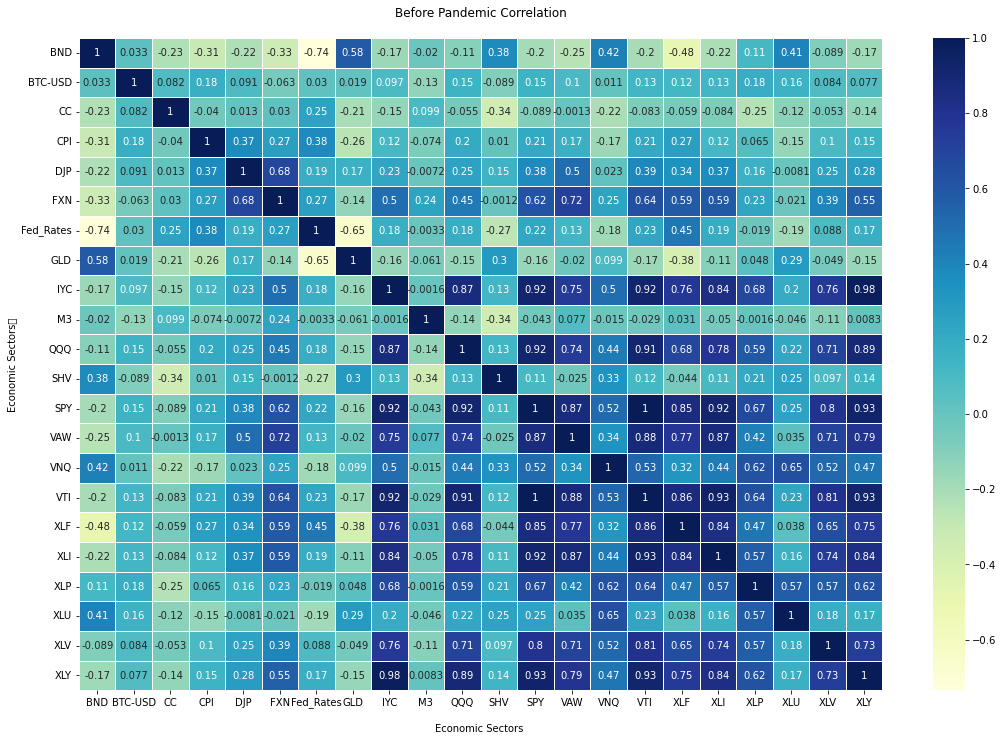

In [244]:
fig, ax = plt.subplots(figsize=(18,12))
hm = sns.heatmap(before_pandemic_corr, annot = True,annot_kws={'size': 10}, linewidth=.5,ax=ax, cmap="YlGnBu")
hm.set(xlabel='\nEconomic Sectors ', ylabel='Economic Sectors\t', title = "Before Pandemic Correlation\n")
plt.show()
#plt.savefig("Plotting_Correlation_HeatMap.jpg")

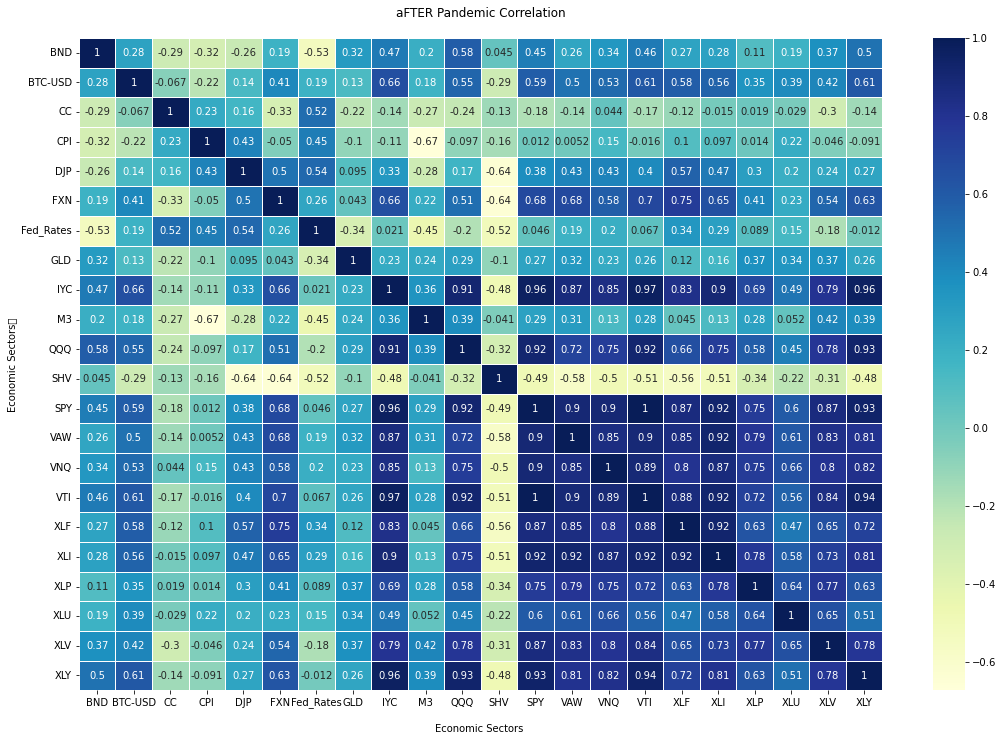

In [248]:
fig, ax = plt.subplots(figsize=(18,12))
hm = sns.heatmap(pandemic_corr, annot = True,annot_kws={'size': 10}, linewidth=.5,ax=ax, cmap="YlGnBu")
hm.set(xlabel='\nEconomic Sectors ', ylabel='Economic Sectors\t', title = "aFTER Pandemic Correlation\n")
plt.show()
#plt.savefig("Plotting_Correlation_HeatMap.jpg")

<AxesSubplot:xlabel='Date'>

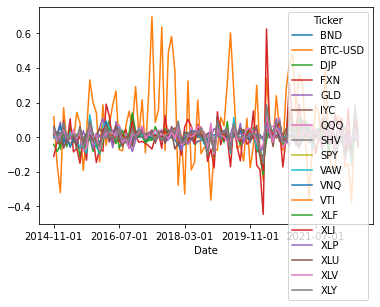

,Y10YDUS
Date,
1953-04-01,2.83
1953-05-01,3.05
1953-06-01,3.11
1953-07-01,2.93
1953-08-01,2.95
...,...
2022-02-01,1.93
2022-03-01,2.13
2022-04-01,2.75


,CONFUS
Date,
1960-01-01,107.60
1960-02-01,105.20
1960-03-01,102.80
1960-04-01,100.40
1960-05-01,101.80
...,...
2022-02-01,67.57
2022-03-01,63.91
2022-04-01,70.15
